In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps = np.finfo(float)
eps

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [127]:
beta = r'$\beta$'
alpha = r'$\alpha$'

In [164]:
u_start = 0.0; u_inc = 0.0001; u_end = 1.0 + u_inc
u = np.arange(u_start, u_end, u_inc)

# Evaluating an expression carefully

Consider the following _complicated_ expressions:

$$a(u) =  \frac{\sqrt{2}}{u^3}(1-\sqrt{1+u^4})$$

$$ b(u) = \frac{1}{u^3} \sqrt{ (4 + u^4) \sqrt{1+ u^4} - 3 u^4 - 4)} $$

Let's see what happens when we try naive evaluations of these expressions.

## Alpha

In [165]:
a_naive = lambda u: np.multiply(np.divide(np.sqrt(2),np.power(u,3)),(1-np.sqrt(1+np.power(u,4))))

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


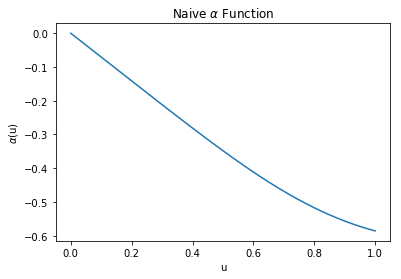

In [176]:
plt.plot(u, a_naive(u))
plt.xlabel('u')
plt.ylabel('{}(u)'.format(alpha))
plt.title('Naive {} Function'.format(alpha))
plt.savefig('./mods_report/naive_alpha_plot')
plt.show()

## Beta

In [163]:
b_naive = lambda u: 1/u**3 * np.sqrt( (4 + u**4) * np.sqrt( 1+ u**4) - 3*u**4 - 4)

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


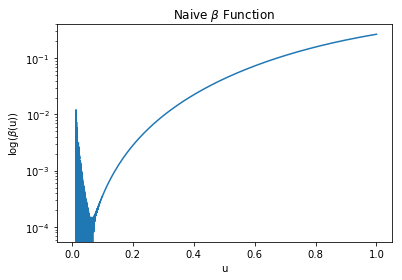

In [174]:
plt.plot(u, b_naive(u))
plt.yscale('log')
plt.xlabel('u')
plt.ylabel('log({}(u))'.format(beta))
plt.title('Naive {} Function'.format(beta))
plt.savefig('./mods_report/naive_beta_plot')
plt.show()

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


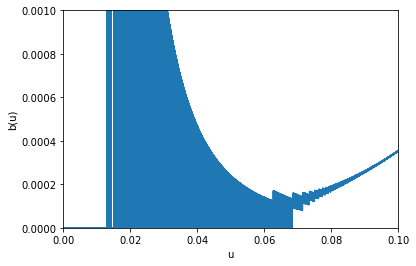

In [5]:
plt.plot(u, b_naive(u))
plt.xlim([0,0.1])
plt.ylim([0,1e-3])
plt.xlabel('u')
plt.ylabel('b(u)')

The bizarre behaviour of $b(u)$ is due to round-off error.

# Taylor series

$$\sqrt{1+x} = 1 + \frac{x}{2} + \sum_{k=2}^{\infty} \frac{(-1)^{k+1}(2k-3)!}{2^{2k-2}(k-2)!k!}x^k$$

Taylor series can help us a lot in this situation and SymPy can help us determine those coefficients. 

In [7]:
import sympy as sp
sp.init_printing()

## Alpha

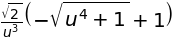

In [9]:
a_expression = sp.S('sqrt(2)/u**3*(1-sqrt(1+u**4))')
a_expression

In [12]:
a_series = sp.series(a_expression, n=20)

In [114]:
a_series

In [13]:
a_taylor = sp.lambdify('u', a_series.removeO())

## Beta

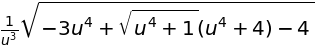

In [135]:
b_expression = sp.S('1/ u^3 * sqrt((4 + u^4)*sqrt(1+ u^4)-3*u^4-4)')
b_expression

In [10]:
b23_series = sp.series(b_expression, n=23)
b27_series = sp.series(b_expression, n=27)
b31_series = sp.series(b_expression, n=31)
b35_series = sp.series(b_expression, n=35)

# CAREFUL: These take a long time to compute

In [68]:
b39_series = sp.series(b_expression, n=39)

In [71]:
b43_series = sp.series(b_expression, n=43)

In [102]:
b47_series = sp.series(b_expression, n=47)

# OKAY: You're safe now

In [11]:
b23 = sp.lambdify('u', b23_series.removeO())
b27 = sp.lambdify('u', b23_series.removeO())
b31 = sp.lambdify('u', b23_series.removeO())
b35 = sp.lambdify('u', b23_series.removeO())

In [69]:
b39 = sp.lambdify('u', b23_series.removeO())

In [72]:
b43 = sp.lambdify('u', b23_series.removeO())

In [103]:
b47 = sp.lambdify('u', b23_series.removeO())

# Horner

## Alpha

In [119]:
q = sp.symbols('q')
gtest0 = np.sqrt(2)/2*(-q + q**5/4 - q**9/8 + 5*q**13/64 - 7*q**17/128)
gtest = sp.horner(gtest0)

In [156]:
gtest

In [158]:
a_horner = lambda u: u*(u**4*(u**4*(u**4*(-0.0386699020961393*u**4+0.055242717280199)-\
                        0.0883883476483184)+0.176776695296637)-0.707106781186548)

## Beta 43

In [75]:
b43_series

In [93]:
q = sp.symbols('q')
ftest0 = np.sqrt(2)*(1/4*q**3 - 3/32*q**7 + 27/512*q**11 - 143/4096*q**15 + 3315/131072*q**19 - \
                     20349/1048576*q**23 + 260015/16777216*q**27 + 1710855/134217728*q**31 - \
                    92116035/8589934592*q**35 + 744762895/68719476736*q**39)
ftest = sp.horner(ftest0)

In [94]:
ftest

In [147]:
b_horner = lambda u: u**3*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(0.0153268598203613*u**4-\
                    0.0151656272365985)+0.0180267866272764)+0.0219176256311202)-0.0274446790511418)+ \
                    0.0357675015202851)-0.0493731785691779)+0.0745776683282687)-0.132582521472478)+ \
                    0.353553390593274)

## Beta 47

In [104]:
b47_series

In [106]:
q = sp.symbols('q')
ftest0 = np.sqrt(2)*(1/4*q**3 - 3/32*q**7 + 27/512*q**11 - 143/4096*q**15 + 3315/131072*q**19 - \
                    20349/1048576*q**23 + 260015/16777216*q**27 + 1710855/134217728*q**31 - \
                    92116035/8589934592*q**35 + 631165425/68719476736*q**39 - 10783406667/1099511627776*q**43)
ftest = sp.horner(ftest0)

In [107]:
ftest

In [148]:
b_horner = lambda u: u**3*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(u**4*(-0.0138698305427678*u**4 + \
                0.0129890788831978) - 0.0151656272365985) + 0.0180267866272764) + 0.0219176256311202) - \
                0.0274446790511418) + 0.0357675015202851) - 0.0493731785691779) + 0.0745776683282687) - \
                0.132582521472478) + 0.353553390593274)

In [149]:
u_start = 0.0; u_inc = 0.0001; u_end = 1.0 + u_inc
u = np.arange(u_start, u_end, u_inc)

# Comparative Plots

## Alpha

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


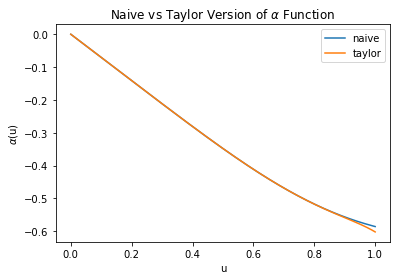

In [139]:
plt.plot(u, a_naive(u), label='naive')
plt.plot(u, a_taylor(u), label='taylor')
plt.xlabel('u')
plt.ylabel('{}(u)'.format(alpha))
plt.title('Naive vs Taylor Version of {} Function'.format(alpha))
plt.savefig('./mods_report/naive_vs_taylor_alpha_plot')
plt.legend()
plt.show()

## Beta

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


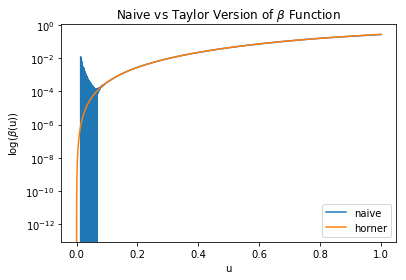

In [141]:
plt.plot(u, b_naive(u), label='naive')
plt.plot(u, b_horner(u), label='horner')
plt.yscale('log')
plt.xlabel('u')
plt.ylabel('log({}(u))'.format(beta))
plt.title('Naive vs Taylor Version of {} Function'.format(beta))
plt.savefig('./mods_report/naive_vs_horner_beta_plot')
plt.legend()
plt.show()

# Absolute Difference

## Alpha

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


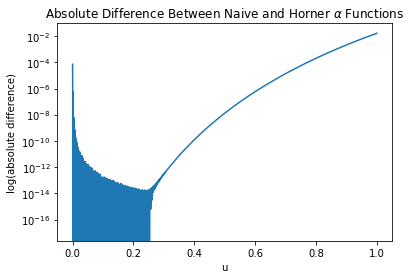

In [161]:
plt.plot(u, a_naive(u) - a_horner(u))
plt.yscale('log')
plt.xlabel('u')
plt.ylabel('log(absolute difference)'.format(alpha))
plt.title('Absolute Difference Between Naive and Horner {} Functions'.format(alpha))
plt.savefig('./mods_report/absolute_naive_vs_horner_alpha_plot')
plt.show()

## Beta

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


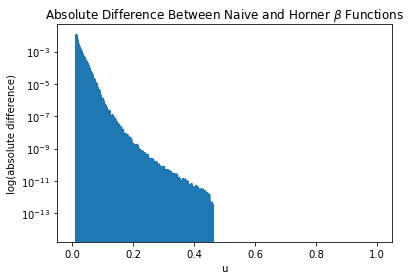

In [160]:
plt.plot(u, b_naive(u) - b_horner(u))
plt.yscale('log')
plt.xlabel('u')
plt.ylabel('log(absolute difference)'.format(beta))
plt.title('Absolute Difference Between Naive and Horner {} Functions'.format(beta))
plt.savefig('./mods_report/absolute_naive_vs_horner_beta_plot')
plt.legend()
plt.show()

## Reading in actual computations

Since the implementation of the horner formula for u > 0.3 does not produce as accurate results as implementing the horner formula when u > 0.6, it is likely that there is a difference in the way MATLAB and python are computing output using the b function.

In [20]:
import scipy.io as sio

In [21]:
modelfull = 'ECCO_20th'
root = '/home/evankielley/IceDEF/WagnerModel'                           
outloc = root + '/output/' + modelfull + '/'
inFile = outloc + 'b_arr.mat'                                     
b_mat = sio.loadmat(inFile)['b_arr'];

In [22]:
u_start = 0.01; u_inc = 0.00001; u_end = 1.0 + u_inc 
u_range = np.arange(u_start,u_end,u_inc)
u_linspace = np.linspace(u_start,u_end,u_inc)

b_py = np.empty([len(u_range), 3])*np.nan

u = u_start
for  i in range(0,len(u_range)):
    b_py[i,:] = u, b_naive(u), b35(u)
    u = u + u_inc;

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [26]:
b_diff = b_mat - b_py

<function matplotlib.pyplot.show>

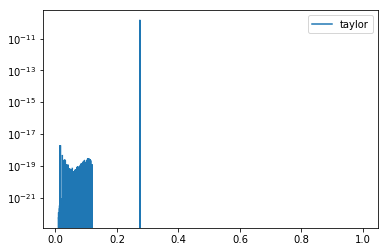

In [27]:
#plt.plot(b_py.T[0,:],np.divide(b_diff[:,1],b35(u)),label='naive')
#plt.plot(b_py.T[0,:],np.divide(b_diff[:,2],b35(u)),label='taylor')
plt.plot(b_py.T[0,:],b_diff[:,1]-b_diff[:,2],label='taylor')

#plt.ylim([0,1e-10])
#plt.xlim([0.2,0.4])
plt.legend()
plt.yscale('log')
plt.show